# Import Packages

In [140]:
import numpy as np
import pandas as pd
import data_clean_utils
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [143]:
pip install dagshub --upgrade

Note: you may need to restart the kernel to use updated packages.


In [144]:
import dagshub
dagshub.init(repo_owner='laxmikantbabaleshwar07', repo_name='zomato-swiggy-delivery-time-prediction', mlflow=True)

Initialized MLflow to track repo "laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction"

Repository laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction initialized!

In [145]:
import mlflow

In [146]:
# set the tracking server

mlflow.set_tracking_uri("https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow")

In [147]:
# mlflow experiment

mlflow.set_experiment("Exp 2 - Model Selection")

<Experiment: artifact_location='mlflow-artifacts:/43db7185f45e40499538cd5598d5d10c', creation_time=1760254571794, experiment_id='1', last_update_time=1760254571794, lifecycle_stage='active', name='Exp 2 - Model Selection', tags={}>

In [148]:
from sklearn import set_config

set_config(transform_output="pandas")

# Load the Data

In [150]:
# load the data

df = pd.read_csv('swiggy.csv')

df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


# Clean Data

In [152]:
data_clean_utils.perform_data_cleaning(df)

In [153]:
# load the cleaned data

df = pd.read_csv('swiggy_cleaned.csv')

df

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,BANG,25,3,friday,0,5.0,19.0,evening,20.183530,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846,short
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,CHEN,11,3,friday,0,15.0,23.0,night,4.657195,short
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393,medium


In [154]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [155]:
# drop columns not required for model input

columns_to_drop =  ['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day",
                    "city_name",
                    "order_day_of_week",
                    "order_month"]

df.drop(columns=columns_to_drop, inplace=True)

df

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,0,10.0,morning,1.489846,short
45498,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,36,0,15.0,evening,NaN,NaN
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,0,15.0,night,4.657195,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,0,5.0,afternoon,6.232393,medium


In [156]:
# check for missing values

df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
is_weekend                0
pickup_time_minutes    1640
order_time_of_day      2070
distance               3630
distance_type          3630
dtype: int64

In [157]:
# check for duplicates

df.duplicated().sum()

0

<Axes: >

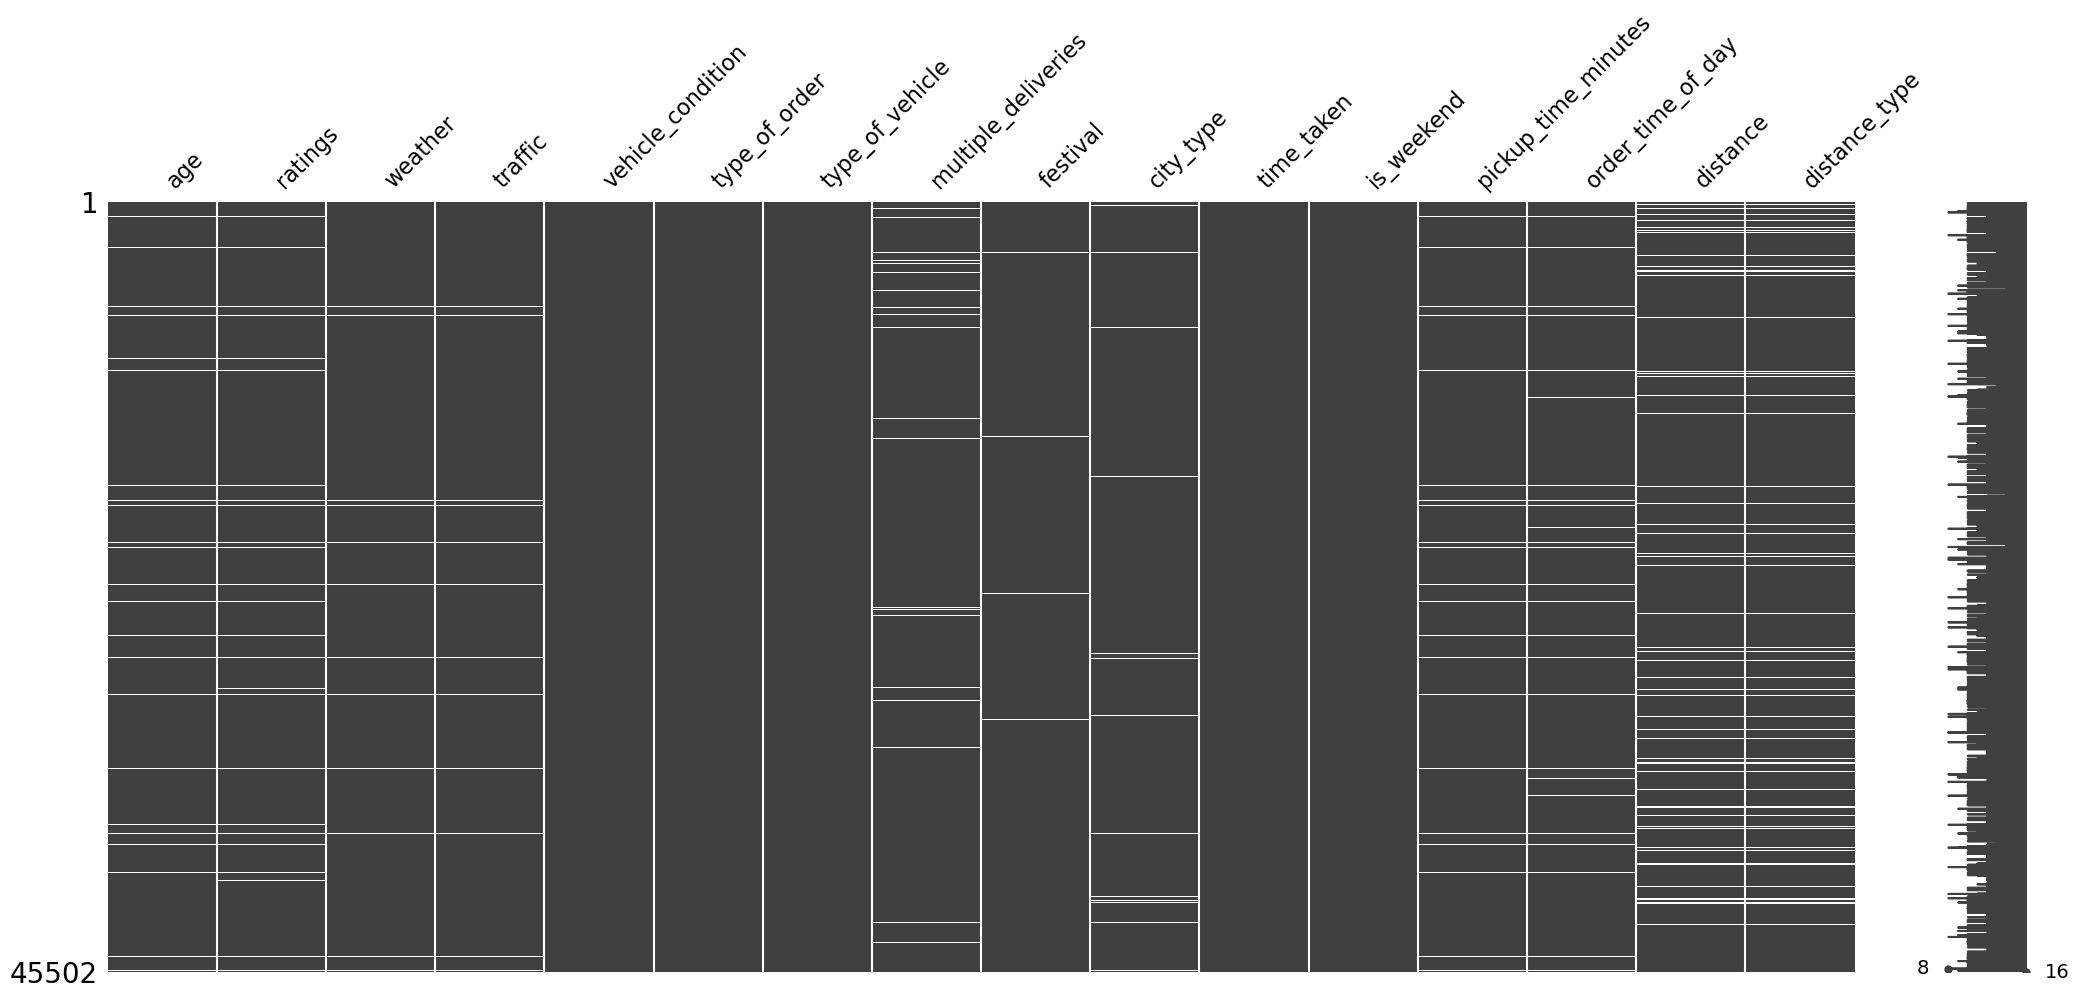

In [158]:
import missingno as msno

msno.matrix(df)

In [159]:
# columns that have missing values

missing_cols = (
                    df
                    .isna()
                    .any(axis=0)
                    .loc[lambda x: x]
                    .index
                )

missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

# Drop Missing values

In [161]:
temp_df = df.copy().dropna()

In [162]:
# split into X and y

X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

X

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45496,35.0,4.2,windy,jam,2,drinks,motorcycle,1.0,no,metropolitian,0,10.0,night,16.600272,very_long
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,0,10.0,morning,1.489846,short
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,0,15.0,night,4.657195,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,0,5.0,afternoon,6.232393,medium


In [163]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [164]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (30156, 15)
The shape of test data is (7539, 15)


In [165]:
# missing values in train data

X_train.isna().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
is_weekend             0
pickup_time_minutes    0
order_time_of_day      0
distance               0
distance_type          0
dtype: int64

In [166]:
# transform target column

pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [167]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [168]:
# percentage of rows in data having missing values

(
    X_train
    .isna()
    .any(axis=1)
    .mean()
    .round(2) * 100
)


0.0

# Pre Processing Pipeline

In [170]:
num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather',
                    'type_of_order',
                    'type_of_vehicle',
                    "festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [171]:
nominal_cat_cols

['weather',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'is_weekend',
 'order_time_of_day']

In [172]:
X_train.isna().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
is_weekend             0
pickup_time_minutes    0
order_time_of_day      0
distance               0
distance_type          0
dtype: int64

In [173]:
# # features to fill values with mode

# features_to_fill_mode = ['multiple_deliveries','festival','city_type']
# features_to_fill_missing = [col for col in nominal_cat_cols if col not in features_to_fill_mode]

# features_to_fill_missing

In [174]:
# # simple imputer to fill categorical vars with mode

# simple_imputer = ColumnTransformer(transformers=[
#     ("mode_imputer",SimpleImputer(strategy="most_frequent",add_indicator=True),features_to_fill_mode),
#     ("missing_imputer",SimpleImputer(strategy="constant",fill_value="missing",add_indicator=True),features_to_fill_missing)
# ],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

# simple_imputer

In [175]:
# simple_imputer.fit_transform(X_train)

In [176]:
# simple_imputer.fit_transform(X_train).isna().sum()

In [177]:
# knn imputer

# knn_imputer = KNNImputer(n_neighbors=5)

In [178]:
# do basic preprocessing

num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [180]:
# generate order for ordinal encoding

traffic_order = ["low","medium","high","jam"]

distance_type_order = ["short","medium","long","very_long"]

In [181]:
# unique categories the ordinal columns

for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['jam' 'medium' 'high' 'low']
distance_type ['medium' 'short' 'long' 'very_long']


In [182]:
# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",
                                     sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order],
                                      encoded_missing_value=-999,
                                      handle_unknown="use_encoded_value",
                                      unknown_value=-1), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


preprocessor

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [183]:
# build the pipeline

processing_pipeline = Pipeline(steps=[
                                # ("simple_imputer",simple_imputer),
                                ("preprocess",preprocessor)
                                # ("knn_imputer",knn_imputer)
                            ])

processing_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  ['age', 'ratings',
                                                   'pickup_time_minutes',
                                                   'distance']),
                                                 ('nominal_encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False))])

In [184]:
# do data preprocessing

X_train_trans = processing_pipeline.fit_transform(X_train)

X_test_trans = processing_pipeline.transform(X_test)

In [185]:
X_train_trans

,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,city_type_semi-urban,city_type_urban,is_weekend_1,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,traffic,distance_type,vehicle_condition,multiple_deliveries
8708,0.473684,0.56,1.0,0.404165,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0,2.0
25198,1.000000,0.76,0.0,0.154044,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1.0
34049,0.473684,0.80,0.5,0.002461,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1,0.0
25987,1.000000,0.92,1.0,0.460411,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0,1.0
37121,0.526316,0.76,0.5,0.243676,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20239,0.578947,0.92,0.5,0.451895,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,0,0.0
7590,0.052632,1.00,1.0,0.612270,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1,1.0
13610,0.526316,0.92,0.0,0.322877,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0.0
1045,0.947368,0.96,0.5,0.004486,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1.0


In [186]:
%pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [193]:




from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna

In [200]:
from sklearn.metrics import r2_score, mean_absolute_error

In [201]:
def objective(trial):
    with mlflow.start_run(nested=True):
        model_name = trial.suggest_categorical("model",["SVM","RF","KNN","GB","XGB","LGBM"])

        if model_name == "SVM":
            kernel_svm = trial.suggest_categorical("kernel_svm",["linear","poly","rbf"])
            if kernel_svm == "linear":
                c_linear = trial.suggest_float("c_linear",0,10)
                model = SVR(C=c_linear,kernel="linear")

            elif kernel_svm == "poly":
                c_poly = trial.suggest_float("c_poly",0,10)
                degree_poly = trial.suggest_int("degree_poly",1,5)
                model = SVR(C=c_poly,degree=degree_poly,
                            kernel="poly")

            else:
                c_rbf = trial.suggest_float("c_rbf",0,100)
                gamma_rbf = trial.suggest_float("gamma_rbf",0,10)
                model = SVR(C=c_rbf,gamma=gamma_rbf,
                            kernel="rbf")

        elif model_name == "RF":
            n_estimators_rf = trial.suggest_int("n_estimators_rf",10,200)
            max_depth_rf = trial.suggest_int("max_depth_rf",2,20)
            model = RandomForestRegressor(n_estimators=n_estimators_rf,
                                        max_depth=max_depth_rf,
                                        random_state=42,
                                        n_jobs=-1)

        elif model_name == "GB":
            n_estimators_gb = trial.suggest_int("n_estimators_gb",10,200)
            learning_rate_gb = trial.suggest_float("learning_rate_gb",0,1)
            max_depth_gb = trial.suggest_int("max_depth_gb",2,20)
            model = GradientBoostingRegressor(n_estimators=n_estimators_gb,
                                                learning_rate=learning_rate_gb,
                                                max_depth=max_depth_gb,
                                                random_state=42)

        elif model_name == "KNN":
            n_neighbors_knn = trial.suggest_int("n_neighbors_knn",1,25)
            weights_knn = trial.suggest_categorical("weights_knn",["uniform","distance"])
            model = KNeighborsRegressor(n_neighbors=n_neighbors_knn,
                                        weights=weights_knn,n_jobs=-1)

        elif model_name == "XGB":
            n_estimators_xgb = trial.suggest_int("n_estimators_xgb",10,200)
            learning_rate_xgb = trial.suggest_float("learning_rate_xgb",0.1,0.5)
            max_depth_xgb = trial.suggest_int("max_depth_xgb",2,20)
            model = XGBRegressor(n_estimators=n_estimators_xgb,
                                    learning_rate=learning_rate_xgb,
                                    max_depth=max_depth_xgb,
                                    random_state=42,
                                    n_jobs=-1)

        elif model_name == "LGBM":
            n_estimators_lgbm = trial.suggest_int("n_estimators_lgbm",10,200)
            learning_rate_lgbm = trial.suggest_float("learning_rate_lgbm",0.1,0.5)
            max_depth_lgbm = trial.suggest_int("max_depth_lgbm",2,20)
            model = LGBMRegressor(n_estimators=n_estimators_lgbm,
                                    learning_rate=learning_rate_lgbm,
                                    max_depth=max_depth_lgbm,
                                    random_state=42)


        # train the model
        model.fit(X_train_trans,y_train_pt.values.ravel())

        # log model params
        mlflow.log_params(model.get_params())

        # get the predictions
        y_pred_train = model.predict(X_train_trans)
        y_pred_test = model.predict(X_test_trans)

        # get the actual predictions values
        y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
        y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

        # calculate the error
        error = mean_absolute_error(y_test,y_pred_test_org)

        # log model_name
        mlflow.log_param("model",model_name)

        # log error
        mlflow.log_metric("MAE",error)

        return error

In [202]:
# create optuna study
study = optuna.create_study(direction="minimize",study_name="model_selection")

with mlflow.start_run(run_name="Best Model") as parent:
    # optimize the objective function
    study.optimize(objective,n_trials=30,n_jobs=-1)

    # log the best parameters
    mlflow.log_params(study.best_params)

    # log the best score
    mlflow.log_metric("best_score",study.best_value)

[I 2025-10-13 19:15:30,644] A new study created in memory with name: model_selection


🏃 View run bemused-shad-52 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/65c45514ee1f4fbfbfb2c775dce9a940
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run lyrical-hog-766 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/5873e579f66b44efbdd58315239a0e1f
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 19:16:37,194] Trial 0 finished with value: 3.0822947934494014 and parameters: {'model': 'RF', 'n_estimators_rf': 111, 'max_depth_rf': 19}. Best is trial 0 with value: 3.0822947934494014.


🏃 View run delicate-ox-549 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/aa53652c07544c56b028beb34992fd3e
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run mysterious-crab-375 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/9e82ff737c4f49259a0ee26ee5328994
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run sincere-snake-377 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/80a9bfc97a2543669ed546c3a4465c02
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 19:16:45,265] Trial 15 finished with value: 3.0560635934291818 and parameters: {'model': 'RF', 'n_estimators_rf': 129, 'max_depth_rf': 13}. Best is trial 15 with value: 3.0560635934291818.
[I 2025-10-13 19:16:49,215] Trial 13 finished with value: 3.0824013861044848 and parameters: {'model': 'RF', 'n_estimators_rf': 149, 'max_depth_rf': 20}. Best is trial 15 with value: 3.0560635934291818.


🏃 View run illustrious-mink-478 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/c114675e738d462285d6c58172dca1f8
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 19:16:53,165] Trial 11 finished with value: 3.0506485992857546 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 192, 'learning_rate_lgbm': 0.11206009356174902, 'max_depth_lgbm': 9}. Best is trial 11 with value: 3.0506485992857546.
[I 2025-10-13 19:16:54,218] Trial 12 finished with value: 3.054026157026841 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 82, 'learning_rate_lgbm': 0.26222974227552287, 'max_depth_lgbm': 11}. Best is trial 11 with value: 3.0506485992857546.


🏃 View run nebulous-mare-54 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/846acd3de15944e88dc0d3cf45743d63
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run upset-shrimp-683 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/73068e3af73b4321a5199df1851561e7
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run kindly-penguin-846 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/c32da516844a4348bf695236ef4bd9aa
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run clumsy-whale-944 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-del

[I 2025-10-13 19:17:06,179] Trial 2 finished with value: 3.370516061782837 and parameters: {'model': 'XGB', 'n_estimators_xgb': 142, 'learning_rate_xgb': 0.11339569036756103, 'max_depth_xgb': 20}. Best is trial 11 with value: 3.0506485992857546.
[I 2025-10-13 19:17:09,166] Trial 9 finished with value: 3.30922269821167 and parameters: {'model': 'XGB', 'n_estimators_xgb': 155, 'learning_rate_xgb': 0.410680478752835, 'max_depth_xgb': 14}. Best is trial 11 with value: 3.0506485992857546.
[I 2025-10-13 19:17:11,176] Trial 5 finished with value: 3.155681907097205 and parameters: {'model': 'RF', 'n_estimators_rf': 54, 'max_depth_rf': 11}. Best is trial 11 with value: 3.0506485992857546.
[I 2025-10-13 19:17:13,178] Trial 3 finished with value: 4.4866550431216154 and parameters: {'model': 'KNN', 'n_neighbors_knn': 3, 'weights_knn': 'distance'}. Best is trial 11 with value: 3.0506485992857546.
[I 2025-10-13 19:17:17,221] Trial 7 finished with value: 3.251474119919988 and parameters: {'model': 'G

🏃 View run indecisive-snake-139 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/94aefd52739b4ba685014ad5959eb2a5
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run spiffy-cod-297 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/ea92b93be9ab48ef9d26bdd9c9ca8dcd
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run indecisive-elk-324 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/1f00f6615b1b4b229983e227d5fcd77b
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run auspicious-tern-247 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swigg

[I 2025-10-13 19:17:34,171] Trial 14 finished with value: 3.052870988845825 and parameters: {'model': 'XGB', 'n_estimators_xgb': 131, 'learning_rate_xgb': 0.1456088331424967, 'max_depth_xgb': 6}. Best is trial 11 with value: 3.0506485992857546.
[I 2025-10-13 19:17:40,164] Trial 8 finished with value: 3.0623889747309256 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 155, 'learning_rate_lgbm': 0.24353292806558968, 'max_depth_lgbm': 14}. Best is trial 11 with value: 3.0506485992857546.
[I 2025-10-13 19:17:41,161] Trial 1 finished with value: 4.1912840326304766 and parameters: {'model': 'KNN', 'n_neighbors_knn': 15, 'weights_knn': 'distance'}. Best is trial 11 with value: 3.0506485992857546.
[I 2025-10-13 19:17:42,194] Trial 4 finished with value: 4.301369810858632 and parameters: {'model': 'KNN', 'n_neighbors_knn': 23, 'weights_knn': 'uniform'}. Best is trial 11 with value: 3.0506485992857546.


🏃 View run illustrious-bat-617 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/3d6810882da942919e1503a67223d6f6
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run hilarious-wren-264 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/4bb86d77efec40e2a7af2ce9fc419c87
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 19:17:53,298] Trial 10 finished with value: 3.1736207008361816 and parameters: {'model': 'XGB', 'n_estimators_xgb': 102, 'learning_rate_xgb': 0.2049391320846398, 'max_depth_xgb': 11}. Best is trial 11 with value: 3.0506485992857546.
[I 2025-10-13 19:17:54,202] Trial 16 finished with value: 3.09285187432888 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 45, 'learning_rate_lgbm': 0.1121562368565861, 'max_depth_lgbm': 16}. Best is trial 11 with value: 3.0506485992857546.


🏃 View run mercurial-ram-367 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/50691a23c62f44e2b4588c43446c95f8
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 19:18:04,334] Trial 17 finished with value: 3.019368726542813 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 171, 'learning_rate_lgbm': 0.11105920693878596, 'max_depth_lgbm': 18}. Best is trial 17 with value: 3.019368726542813.


🏃 View run sassy-colt-452 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/403b16a075344da9b68c836a8cf26f68
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 19:18:08,191] Trial 18 finished with value: 3.187835693359375 and parameters: {'model': 'XGB', 'n_estimators_xgb': 129, 'learning_rate_xgb': 0.2308816408313756, 'max_depth_xgb': 10}. Best is trial 17 with value: 3.019368726542813.


🏃 View run angry-hog-533 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/842527b58cf4473eae2388386fdf3ea2
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run placid-tern-412 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/af3ac0d3c5df4ff38a671716c393dea4
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 19:18:11,216] Trial 25 finished with value: 3.190925704182508 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 193, 'learning_rate_lgbm': 0.10127219626209832, 'max_depth_lgbm': 4}. Best is trial 17 with value: 3.019368726542813.
[I 2025-10-13 19:18:12,335] Trial 24 finished with value: 3.659148720575634 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 193, 'learning_rate_lgbm': 0.1072048461141058, 'max_depth_lgbm': 2}. Best is trial 17 with value: 3.019368726542813.


🏃 View run funny-worm-703 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/cf80ea1914174adf8990341a1e895270
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 19:18:19,363] Trial 21 finished with value: 3.4645688417926803 and parameters: {'model': 'GB', 'n_estimators_gb': 167, 'learning_rate_gb': 0.3172463846731638, 'max_depth_gb': 17}. Best is trial 17 with value: 3.019368726542813.


🏃 View run unequaled-bat-890 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/eab075ff12ac431183bfe5c7ce529dbf
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 19:18:49,904] Trial 6 finished with value: 4.675478647903702 and parameters: {'model': 'SVM', 'kernel_svm': 'linear', 'c_linear': 1.6527830508542807}. Best is trial 17 with value: 3.019368726542813.


🏃 View run learned-gnu-943 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/eeb5f0126a4a4d7d922a14a54aa38a57
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 19:19:54,764] Trial 27 finished with value: 4.674963961406018 and parameters: {'model': 'SVM', 'kernel_svm': 'linear', 'c_linear': 0.1565855462726331}. Best is trial 17 with value: 3.019368726542813.


🏃 View run fun-ant-307 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/86a5ecb4c4134abea772716df1ff1ad1
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 19:20:24,793] Trial 29 finished with value: 3.9845739664569835 and parameters: {'model': 'SVM', 'kernel_svm': 'poly', 'c_poly': 1.6030339665663957, 'degree_poly': 2}. Best is trial 17 with value: 3.019368726542813.


🏃 View run debonair-mare-216 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/254e88f61f9b4274954b431207aaf78f
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 19:26:26,709] Trial 23 finished with value: 3.731374421252384 and parameters: {'model': 'SVM', 'kernel_svm': 'poly', 'c_poly': 6.604368891987759, 'degree_poly': 3}. Best is trial 17 with value: 3.019368726542813.


🏃 View run adorable-chimp-370 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/2c7a04d8eba54782a37773adf5bd4cbd
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 19:27:33,532] Trial 19 finished with value: 4.67545711454315 and parameters: {'model': 'SVM', 'kernel_svm': 'linear', 'c_linear': 9.640674614402279}. Best is trial 17 with value: 3.019368726542813.


🏃 View run dapper-lynx-338 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/fa6bd714a22b44bbac52decd6f479a0e
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 19:27:53,217] Trial 20 finished with value: 4.67548910393728 and parameters: {'model': 'SVM', 'kernel_svm': 'linear', 'c_linear': 8.70491893934215}. Best is trial 17 with value: 3.019368726542813.


🏃 View run traveling-ram-953 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/2fa27fcf9d224a5ea0c4f22f20802f33
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 19:27:56,264] Trial 28 finished with value: 6.387626610733152 and parameters: {'model': 'SVM', 'kernel_svm': 'rbf', 'c_rbf': 25.099069957926304, 'gamma_rbf': 5.749600058543436}. Best is trial 17 with value: 3.019368726542813.


🏃 View run upset-mare-130 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/f8c5e56abd504b74ae4c205608cfe2ca
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 19:28:48,342] Trial 22 finished with value: 3.662532422227425 and parameters: {'model': 'SVM', 'kernel_svm': 'poly', 'c_poly': 1.949132517834658, 'degree_poly': 4}. Best is trial 17 with value: 3.019368726542813.


🏃 View run rare-mouse-811 at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/4655dd419bdb43059a99f8d28306bd49
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2025-10-13 20:17:07,114] Trial 26 finished with value: 3.644612315775363 and parameters: {'model': 'SVM', 'kernel_svm': 'poly', 'c_poly': 8.113147178848408, 'degree_poly': 4}. Best is trial 17 with value: 3.019368726542813.


🏃 View run Best Model at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/d891edd53c154b3b9470bbe1c6b79173
🧪 View experiment at: https://dagshub.com/laxmikantbabaleshwar07/zomato-swiggy-delivery-time-prediction.mlflow/#/experiments/1


In [212]:
study.best_params

{'model': 'LGBM',
 'n_estimators_lgbm': 171,
 'learning_rate_lgbm': 0.11105920693878596,
 'max_depth_lgbm': 18}

In [226]:
# best score

study.best_value

3.019368726542813

In [228]:
lgbm_params = {
    "n_estimators": 145,
    "learning_rate": 0.16632111599858262,
    "max_depth": 17
}

In [229]:
# train the model on best parameters

lgbm = LGBMRegressor(**lgbm_params)

lgbm.fit(X_train_trans,y_train_pt.values.ravel())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 30156, number of used features: 25
[LightGBM] [Info] Start training from score -0.000000


LGBMRegressor(learning_rate=0.16632111599858262, max_depth=17, n_estimators=145)

In [230]:
# get the predictions
y_pred_train = lgbm.predict(X_train_trans)
y_pred_test = lgbm.predict(X_test_trans)

In [231]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [232]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 2.78 minutes
The test error is 3.02 minutes


In [233]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.86
The test r2 score is 0.84


In [234]:
# dataframe of results

study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_c_linear,params_c_poly,params_c_rbf,params_degree_poly,params_gamma_rbf,...,params_max_depth_rf,params_max_depth_xgb,params_model,params_n_estimators_gb,params_n_estimators_lgbm,params_n_estimators_rf,params_n_estimators_xgb,params_n_neighbors_knn,params_weights_knn,state
0,0,3.082295,2025-10-13 19:15:31.157252,2025-10-13 19:16:37.194582,0 days 00:01:06.037330,NaN,NaN,NaN,NaN,NaN,...,19.0,NaN,RF,NaN,NaN,111.0,NaN,NaN,NaN,COMPLETE
1,1,4.191284,2025-10-13 19:15:31.159260,2025-10-13 19:17:41.161184,0 days 00:02:10.001924,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,KNN,NaN,NaN,NaN,NaN,15.0,distance,COMPLETE
2,2,3.370516,2025-10-13 19:15:31.160654,2025-10-13 19:17:06.179121,0 days 00:01:35.018467,NaN,NaN,NaN,NaN,NaN,...,NaN,20.0,XGB,NaN,NaN,NaN,142.0,NaN,NaN,COMPLETE
3,3,4.486655,2025-10-13 19:15:31.161659,2025-10-13 19:17:13.178657,0 days 00:01:42.016998,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,KNN,NaN,NaN,NaN,NaN,3.0,distance,COMPLETE
4,4,4.301370,2025-10-13 19:15:31.163655,2025-10-13 19:17:42.194956,0 days 00:02:11.031301,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,KNN,NaN,NaN,NaN,NaN,23.0,uniform,COMPLETE
5,5,3.155682,2025-10-13 19:15:31.164654,2025-10-13 19:17:11.176323,0 days 00:01:40.011669,NaN,NaN,NaN,NaN,NaN,...,11.0,NaN,RF,NaN,NaN,54.0,NaN,NaN,NaN,COMPLETE
6,6,4.675479,2025-10-13 19:15:31.166655,2025-10-13 19:18:49.904552,0 days 00:03:18.737897,1.652783,NaN,NaN,NaN,NaN,...,NaN,NaN,SVM,NaN,NaN,NaN,NaN,NaN,NaN,COMPLETE
7,7,3.251474,2025-10-13 19:15:31.167500,2025-10-13 19:17:17.221198,0 days 00:01:46.053698,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GB,37.0,NaN,NaN,NaN,NaN,NaN,COMPLETE
8,8,3.062389,2025-10-13 19:15:31.167500,2025-10-13 19:17:40.164898,0 days 00:02:08.997398,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,LGBM,NaN,155.0,NaN,NaN,NaN,NaN,COMPLETE
9,9,3.309223,2025-10-13 19:15:31.167500,2025-10-13 19:17:09.166721,0 days 00:01:37.999221,NaN,NaN,NaN,NaN,NaN,...,NaN,14.0,XGB,NaN,NaN,NaN,155.0,NaN,NaN,COMPLETE


In [235]:
# model frequency

study.trials_dataframe()['params_model'].value_counts()

params_model
SVM     9
LGBM    7
XGB     5
RF      4
KNN     3
GB      2
Name: count, dtype: int64

In [236]:
# avg scores for all tested models

study.trials_dataframe().groupby("params_model")['value'].mean().sort_values()

params_model
RF      3.094110
LGBM    3.161337
XGB     3.218813
GB      3.358021
KNN     4.326436
SVM     4.456901
Name: value, dtype: float64

In [237]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(regressor=lgbm,
                                    transformer=pt)

In [238]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,
                         X_train_trans,
                         y_train,
                         scoring="neg_mean_absolute_error",
                         cv=5,n_jobs=-1)

scores

array([-3.06435673, -3.04327813, -3.0700516 , -3.06852842, -3.05699881])

In [239]:
# mean score

- scores.mean()

3.060642738151514

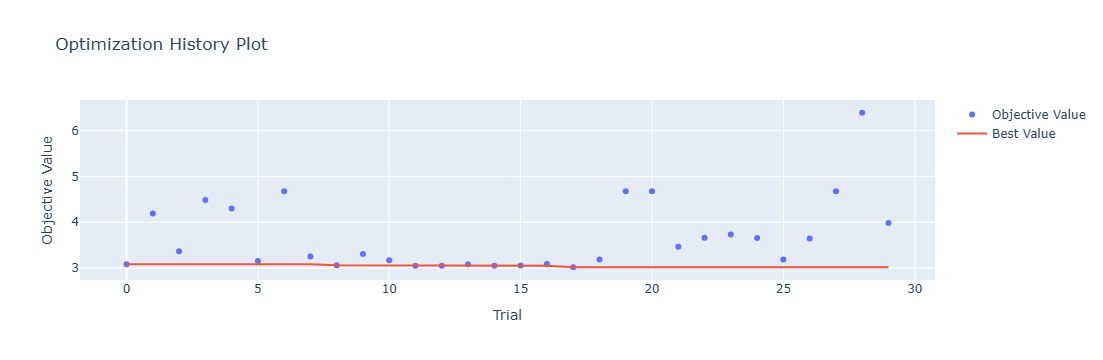

In [240]:
# optimization history plot

optuna.visualization.plot_optimization_history(study)

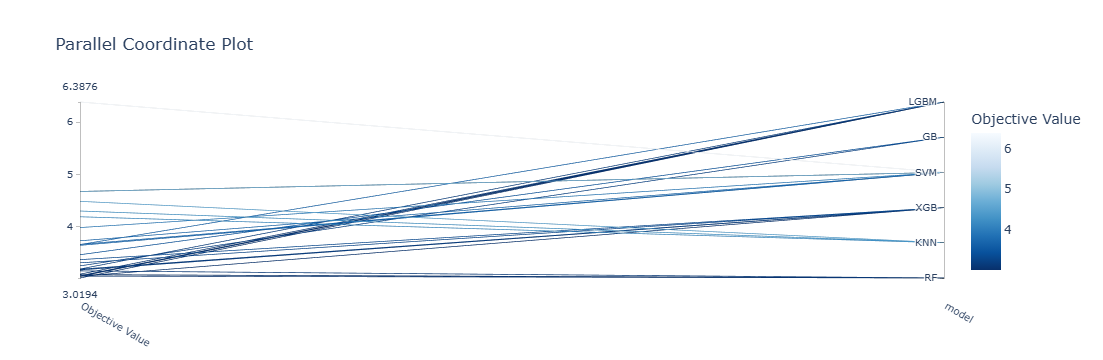

In [242]:
# partial coord plot

optuna.visualization.plot_parallel_coordinate(study,params=["model"])